# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

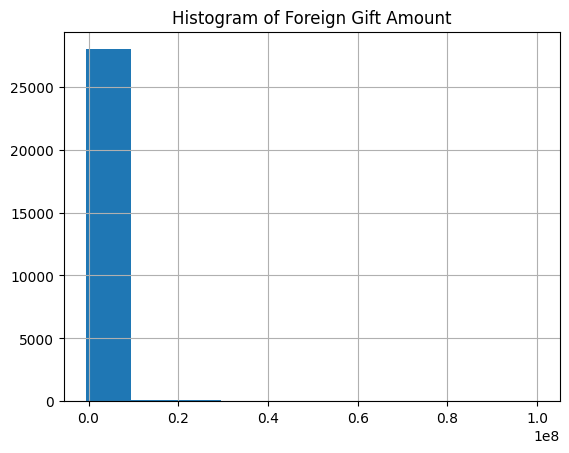

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64 

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Contracts: 17274, Real Estate: 11, Monetary Gifts: 10936 



/tmp/ipython-input-257377150.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Contracts:', str(df['Gift Type'].value_counts()[0]) + ',',
/tmp/ipython-input-257377150.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Real Estate:', str(df['Gift Type'].value_counts()[2]) + ',',
/tmp/ipython-input-257377150.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Monetary Gifts:', df['Gift Type'].value_counts()[1], '\n')
/u

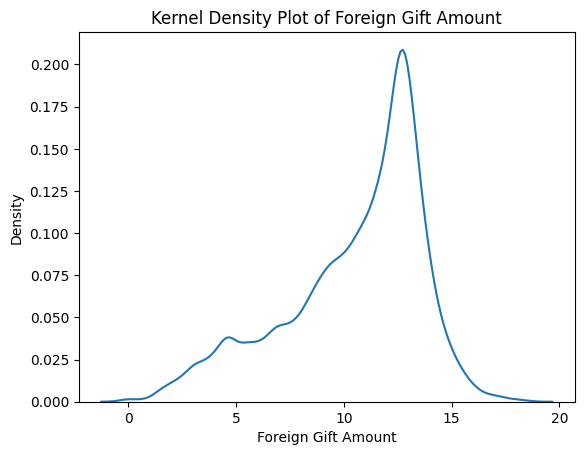

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


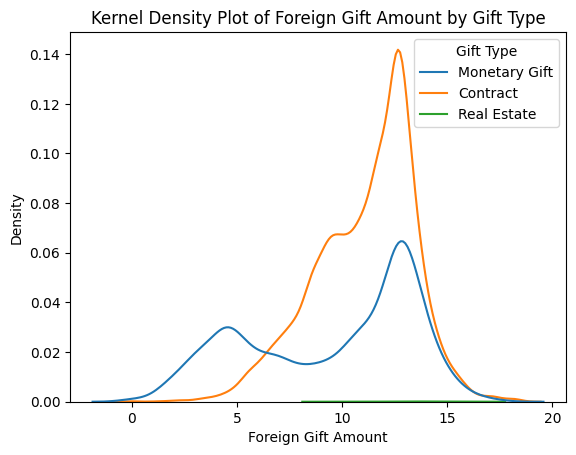

Top 15 countries by number of gifts: 
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64 

Top 15 countires by total gift amount: 
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRA

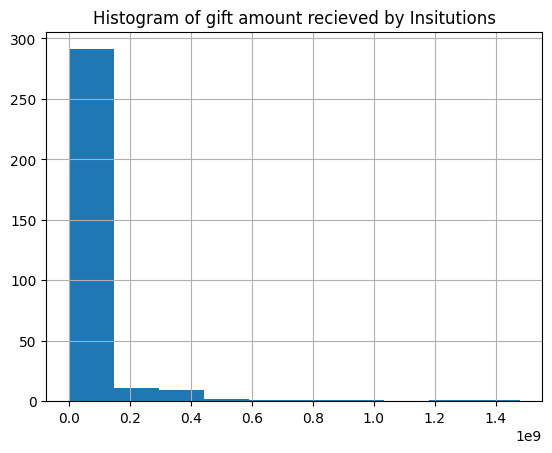

Top giftors: 
 Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
                                          ...    
Noh, Jongyoun                                   1
Zhang, Stephanie                                1
VISETSUTH, PEERANUT                             1
Francois, Pierre                                1
Cox, Melati                                     1
Name: Foreign Gift Amount, Length: 8993, dtype: int64


In [39]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#2
df = pd.read_csv('/data/ForeignGifts_edu.csv')
df['Foreign Gift Amount'].hist()
plt.title('Histogram of Foreign Gift Amount')
plt.show()
print(df['Foreign Gift Amount'].describe(), '\n')
#Gift amount distribution is long tail, with mean of 580,000 and median 94,000.

#3
print(df['Gift Type'].value_counts())
print('Contracts:', str(df['Gift Type'].value_counts()[0]) + ',',
      'Real Estate:', str(df['Gift Type'].value_counts()[2]) + ',',
      'Monetary Gifts:', df['Gift Type'].value_counts()[1], '\n')

#4
kde1 = sns.kdeplot(data = df, x = np.log(df['Foreign Gift Amount']))
plt.title('Kernel Density Plot of Foreign Gift Amount')
plt.show()
kde2 = sns.kdeplot(data = df, x = np.log(df['Foreign Gift Amount']), hue = df['Gift Type'])
plt.title('Kernel Density Plot of Foreign Gift Amount by Gift Type')
plt.show()
#Monetary gift distribution has two peaks with the higher being aproximately the same x value as contracts. Real estate has low overall weight. compared to the others.

#5
print('Top 15 countries by number of gifts:', '\n', df['Country of Giftor'].value_counts().head(15), '\n')
print('Top 15 countires by total gift amount:', '\n', df['Foreign Gift Amount'].groupby(df['Country of Giftor']).sum().sort_values(ascending = False).head(15), '\n')

#6
iga = df['Foreign Gift Amount'].groupby(df['Institution Name']).sum().sort_values(ascending = False)
print('Top 15 institutions by total gift amount:', '\n', iga.head(15), '\n')
iga.hist()
plt.title('Histogram of gift amount recieved by Insitutions')
plt.show()
df.head()
#7
print('Top giftors:', '\n', df['Foreign Gift Amount'].groupby(df['Giftor Name']).sum().sort_values(ascending = False))

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

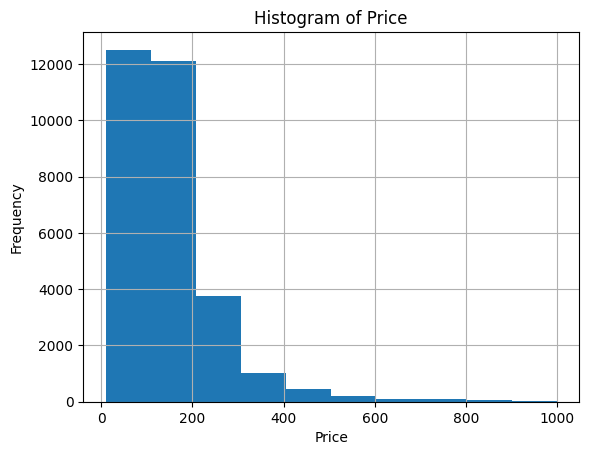

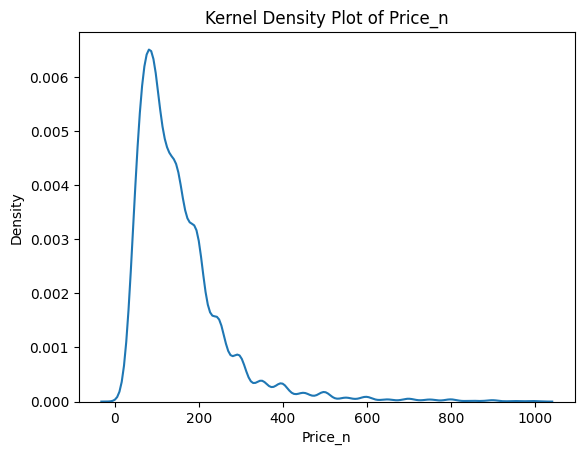

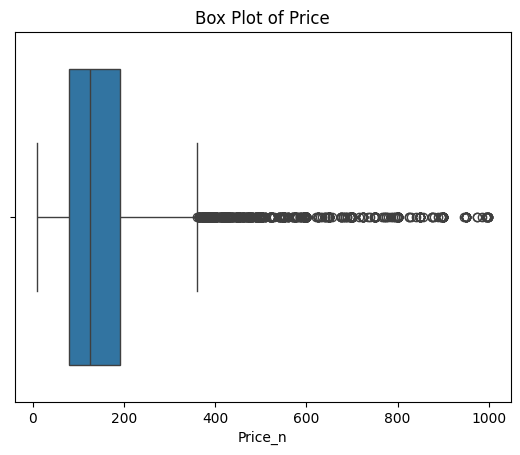

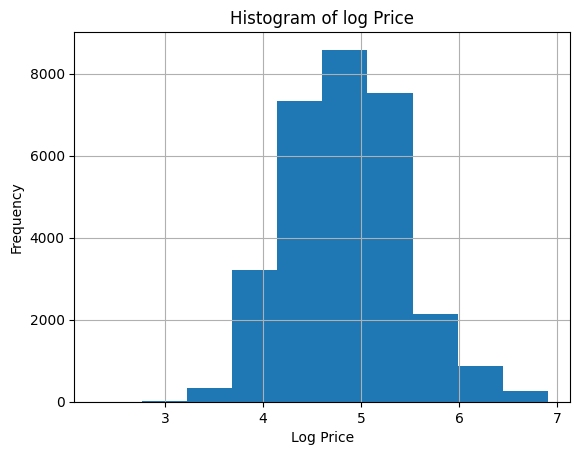

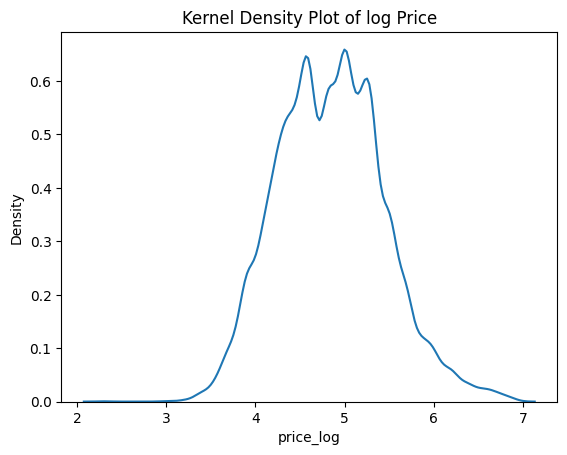

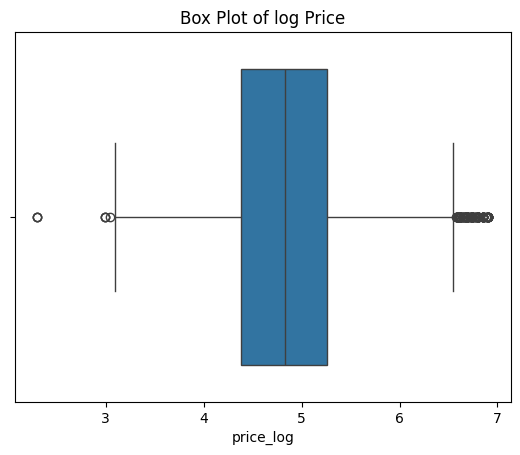

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


In [81]:
#1
air = pd.read_csv('/data/airbnb_hw.csv')

#2
print(air.head(), '\n',
  air.shape, '\n\n', air.shape[0], 'observations', '\n \n',
  air.columns, '\n\n',
  air.describe()) #30478x13 with 30478 observations

#3
pd.crosstab(air['Room Type'], air['Property Type'])
#greatest grouping is entire apartment, distributions vary on property type but tend to be more entire rentals, apartment is by far the most populous type,
#Private room more common than entire property: bed and breakfast, house, other

#4
air['Price_n']=pd.to_numeric(air['Price'], errors = 'coerce')
air['Price_n'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()
sns.kdeplot(data = air, x=air['Price_n'])
plt.title('Kernel Density Plot of Price_n')
plt.show()
sns.boxplot(data = air, x = air['Price_n'])
plt.title('Box Plot of Price')
plt.show()
air['Price_n'].describe()

air['price_log']=np.log(air['Price_n'])
air['price_log'].hist()
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Histogram of log Price')
plt.show()
sns.kdeplot(data = air, x=air['price_log'])
plt.title('Kernel Density Plot of log Price')
plt.show()
sns.boxplot(data = air, x = air['price_log'])
plt.title('Box Plot of log Price')
plt.show()
air['price_log'].describe()



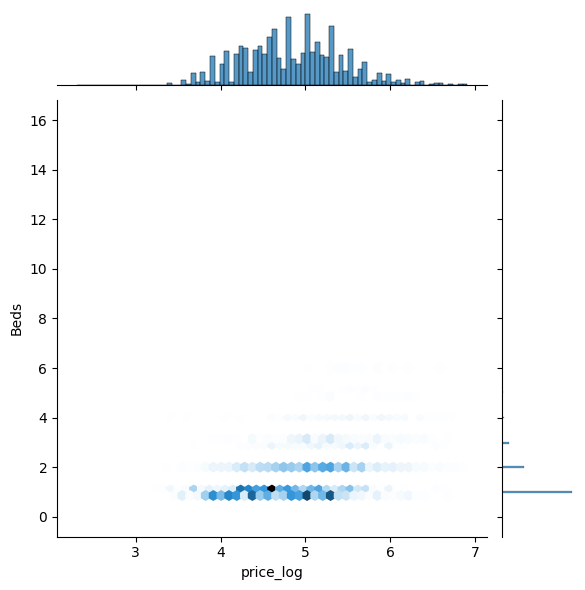

In [88]:
##5
sns.scatterplot(data = air, x = 'price_log', y = 'Beds')
plt.title('Scatterplot of log Price and Beds')
plt.show()
#densely populated lower right corner (greater number of lower beds with med-high price)
#little data on left side and top (not much low price or high bed number)

air['Price_n'].groupby(air['Beds']).describe()
#more beds is rougly greater average price and stnadard deviation. However mean price begins to decrease or level off after 9 beds.

#6
sns.scatterplot(data = air, x = 'price_log', y = 'Beds', hue = 'Room Type', style = 'Property Type')
plt.title('Scatterplot of log Price and Beds by room type nad property type')
plt.show()
#shared room is cheaper than private rooms and private rooms are cheaper than entire
#house is more populous at higher bed numbers
air['Price_n'].groupby([air['Room Type'], air['Property Type']]).describe()
#highest mean price is entire loft or entire other. highest entire other has highest std
#median seems to be better estimator of central tendency because a mean with a high standard deviation is not as helpful as the middle quartile which is likely to also be around the mode.

#7
sns.jointplot(data = air, x = 'price_log', y = 'Beds', kind = 'hex')
#data is mostly distributed around 1-2 beds and price_log between 4 and 6; so low beds and medium price.
#this plot shows me there were a lot of outliers in the previous plots.


**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [44]:
rig = pd.read_csv('/data/drilling_rigs.csv')